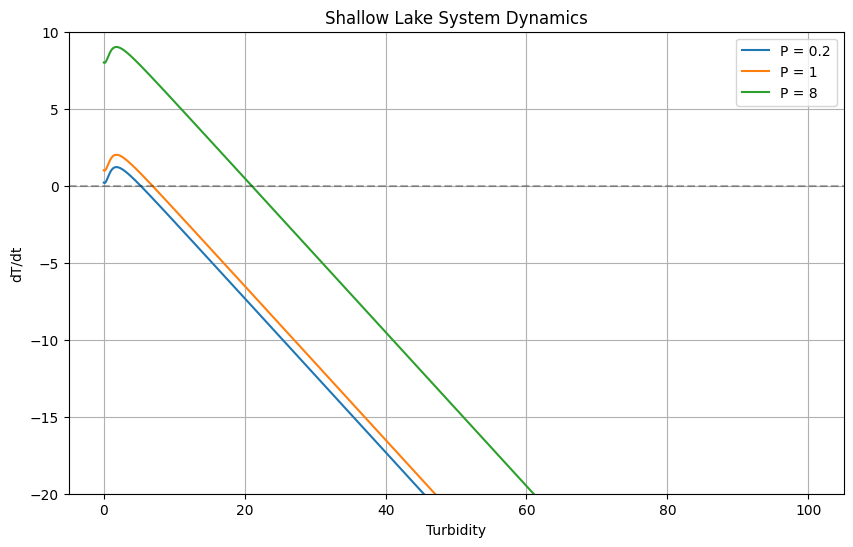

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def lake_state(P, r=2.5, b=0.5):
    """
    Simple shallow lake model
    P: Phosphorus input (control parameter)
    r: Recycling rate
    b: Sedimentation rate
    Returns equilibrium turbidity
    """
    # Generate range of possible turbidity values
    T = np.linspace(0, 100, 1000)
    
    # Lake dynamics equation
    # dT/dt = P + r*T^2/(1+T^2) - b*T
    equilibrium = P + r*T**2/(1+T**2) - b*T
    
    return T, equilibrium

# Generate data for different phosphorus levels
P_values = [0.2, 1, 8]
T = np.linspace(0, 100, 1000)

plt.figure(figsize=(10,6))
for P in P_values:
    T, eq = lake_state(P)
    plt.plot(T, eq, label=f'P = {P}')

plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True)
plt.xlabel('Turbidity')
plt.ylabel('dT/dt')
plt.title('Shallow Lake System Dynamics')
plt.legend()
plt.ylim(-20, 10)
plt.show()

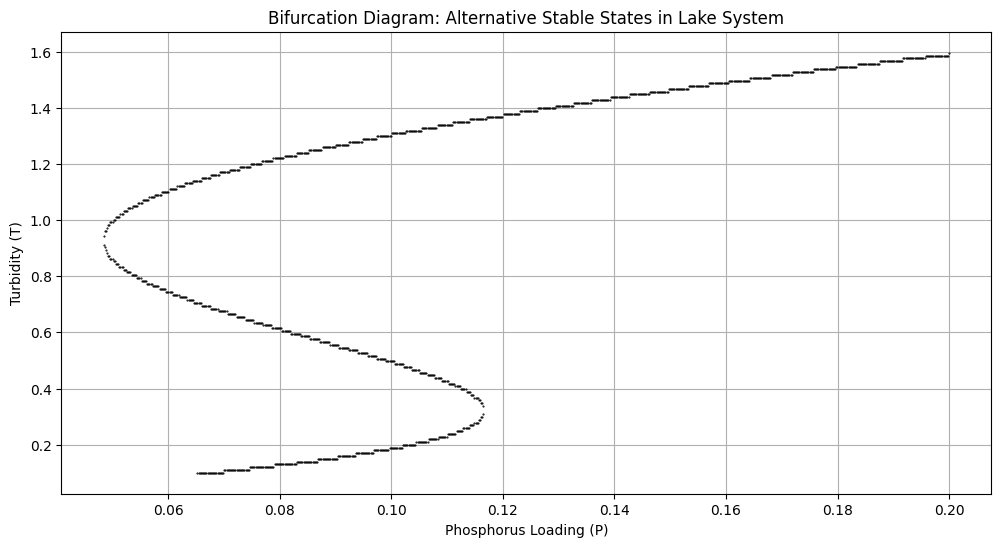

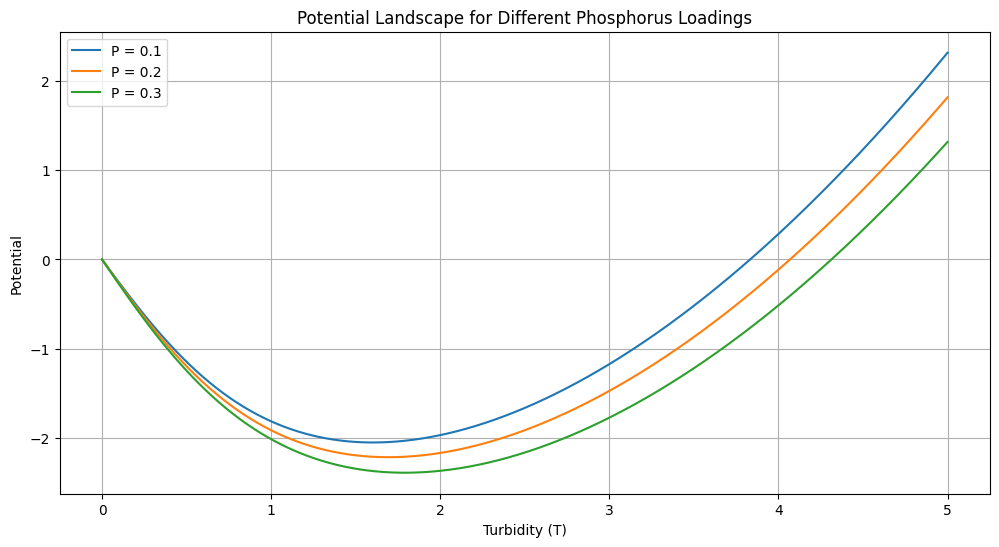

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def lake_dynamics(T, P, r=1.5, b=0.8):
    """
    Lake dynamics equation
    T: Turbidity
    P: Phosphorus input
    r: Recycling rate
    b: Sedimentation rate
    """
    return P + (r * T**2)/(1 + T**2) - b*T

# Create a range of turbidity and phosphorus values
T = np.linspace(0.1, 10, 1000)
P_range = np.linspace(0, 0.2, 1000)

# Create figure
plt.figure(figsize=(12, 6))

# Store all equilibrium points
P_points = []
T_points = []

# Find equilibria for different P values
for P in P_range:
    dT = lake_dynamics(T, P)
    # Find where dT/dt crosses zero (equilibrium points)
    zero_crossings = np.where(np.diff(np.signbit(dT)))[0]
    eq_points = T[zero_crossings]
    
    # Store the points
    for eq in eq_points:
        P_points.append(P)
        T_points.append(eq)

# Plot all points
plt.plot(P_points, T_points, 'k.', markersize=1)
plt.xlabel('Phosphorus Loading (P)')
plt.ylabel('Turbidity (T)')
plt.title('Bifurcation Diagram: Alternative Stable States in Lake System')
plt.grid(True)
plt.show()

# Now let's plot the potential landscape
def potential_landscape(T, P, r=2.5, b=0.5):
    """Calculate potential landscape for given P value"""
    return -P*T - r*np.arctan(T) + (b*T**2)/2

# Create visualization of potential landscape
P_values = [0.1, 0.2, 0.3]
T = np.linspace(0, 5, 1000)

plt.figure(figsize=(12, 6))
for P in P_values:
    V = potential_landscape(T, P)
    plt.plot(T, V, label=f'P = {P}')

plt.xlabel('Turbidity (T)')
plt.ylabel('Potential')
plt.title('Potential Landscape for Different Phosphorus Loadings')
plt.legend()
plt.grid(True)
plt.show()